# Tópico 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função exata
def solucao_exata(t, lambda_):
    return np.exp(lambda_ * t)

# Função f
def f(u, t, lambda_):
    return lambda_ * u

# Funções de método numérico ajustadas
def euler_explicito(f, u0, t0, tf, h, lambda_):
    t_values = np.arange(t0, tf + h, h)
    u_values = np.zeros(len(t_values))
    u = u0
    for i in range(len(t_values)):
        u_values[i] = u
        u = u + h * f(u, t_values[i], lambda_)
    return t_values, u_values

def runge_kutta_2(f, u0, t0, tf, h, lambda_):
    t_values = np.arange(t0, tf + h, h)
    u_values = np.zeros(len(t_values))
    u = u0
    for i in range(len(t_values)):
        u_values[i] = u
        k1 = h * f(u, t_values[i], lambda_)
        k2 = h * f(u + 0.5 * k1, t_values[i] + 0.5 * h, lambda_)
        u = u + k2
    return t_values, u_values

def runge_kutta_4(f, u0, t0, tf, h, lambda_):
    t_values = np.arange(t0, tf + h, h)
    u_values = np.zeros(len(t_values))
    u = u0
    for i in range(len(t_values)):
        u_values[i] = u
        k1 = h * f(u, t_values[i], lambda_)
        k2 = h * f(u + 0.5 * k1, t_values[i] + 0.5 * h, lambda_)
        k3 = h * f(u + 0.5 * k2, t_values[i] + 0.5 * h, lambda_)
        k4 = h * f(u + k3, t_values[i] + h, lambda_)
        u = u + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return t_values, u_values

def adams_bashforth_2(f, u0, t0, tf, h, lambda_):
    t_values = np.arange(t0, tf + h, h)
    u_values = np.zeros(len(t_values))

    # Primeiro passo com Runge-Kutta de ordem 2 para iniciar o método de Adams-Bashforth
    k1 = h * f(u0, t0, lambda_)
    k2 = h * f(u0 + 0.5 * k1, t0 + 0.5 * h, lambda_)
    u1 = u0 + k2

    u_values[0] = u0
    u_values[1] = u1

    u_prev = u0
    u = u1
    for i in range(2, len(t_values)):
        u_next = u + (h / 2) * (3 * f(u, t_values[i-1], lambda_) - f(u_prev, t_values[i-2], lambda_))
        u_prev = u
        u = u_next
        u_values[i] = u

    return t_values, u_values

def newton_method(f, u_guess, t, h, u_prev, u_prev_prev, lambda_):
    tol = 1e-10
    max_iter = 100
    u = u_guess

    for _ in range(max_iter):
        func = u - u_prev - (h / 12) * (5 * f(u, t, lambda_) + 8 * f(u_prev, t - h, lambda_) - f(u_prev_prev, t - 2 * h, lambda_))
        dfunc = 1 - (h / 12) * 5 * (f(u + tol, t, lambda_) - f(u, t, lambda_)) / tol

        delta = -func / dfunc
        u = u + delta

        if abs(delta) < tol:
            break

    return u

def adams_moulton_2_newton(f, u0, t0, tf, h, lambda_):
    t_values = np.arange(t0, tf + h, h)
    u_values = np.zeros(len(t_values))

    # Primeiro passo com Runge-Kutta de ordem 2 para iniciar o método de Adams-Moulton
    k1 = h * f(u0, t0, lambda_)
    k2 = h * f(u0 + 0.5 * k1, t0 + 0.5 * h, lambda_)
    u1 = u0 + k2

    u_values[0] = u0
    u_values[1] = u1

    u_prev_prev = u0
    u_prev = u1
    u = u1
    for i in range(2, len(t_values)):
        t_next = t_values[i]
        u_guess = u + (h / 2) * (3 * f(u, t_values[i-1], lambda_) - f(u_prev_prev, t_values[i-2], lambda_))

        u_next = newton_method(f, u_guess, t_next, h, u_prev, u_prev_prev, lambda_)

        u_prev_prev = u_prev
        u_prev = u
        u = u_next
        u_values[i] = u

    return t_values, u_values

def adams_moulton_2_predictor_corrector(f, u0, t0, tf, h, lambda_):
    t_values = np.arange(t0, tf + h, h)
    u_values = np.zeros(len(t_values))

    # Primeiro passo com Runge-Kutta de ordem 2 para iniciar o método de Adams-Moulton
    k1 = h * f(u0, t0, lambda_)
    k2 = h * f(u0 + 0.5 * k1, t0 + 0.5 * h, lambda_)
    u1 = u0 + k2

    u_values[0] = u0
    u_values[1] = u1

    u_prev_prev = u0
    u_prev = u1
    u = u1
    for i in range(2, len(t_values)):
        t_next = t_values[i]
        # Preditor
        u_predictor = u_prev + (h / 2) * (3 * f(u_prev, t_values[i-1], lambda_) - f(u_prev_prev, t_values[i-2], lambda_))

        # Corretor
        u_next = u_prev + (h / 12) * (5 * f(u_predictor, t_next, lambda_) + 8 * f(u_prev, t_values[i-1], lambda_) - f(u_prev_prev, t_values[i-2], lambda_))

        u_prev_prev = u_prev
        u_prev = u
        u = u_next
        u_values[i] = u

    return t_values, u_values


# Tópico 2



<ipython-input-13-4c64295beaf9>:18: ComplexWarning: Casting complex values to real discards the imaginary part
  u_values[i] = u


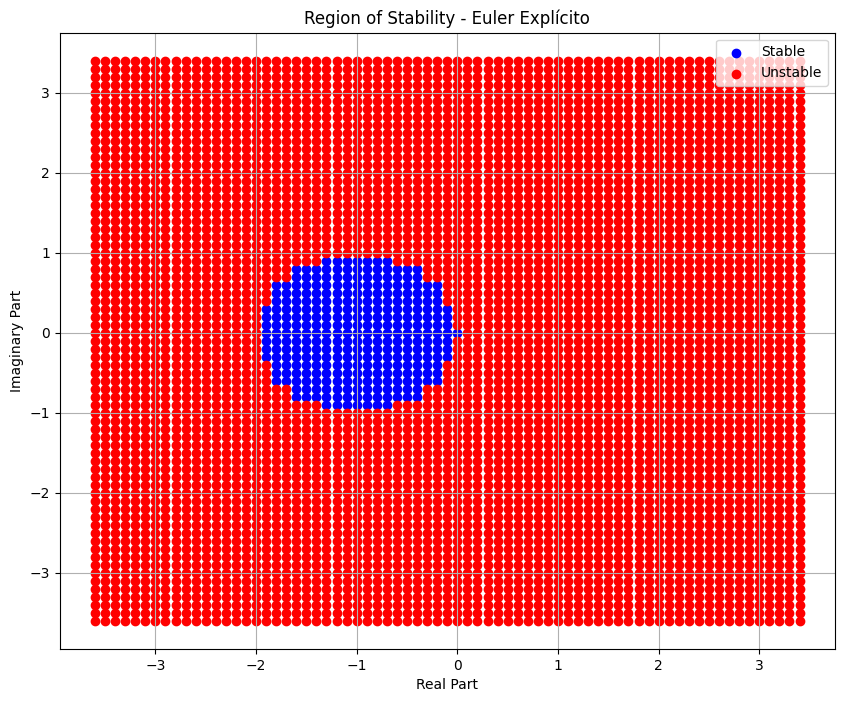

<ipython-input-13-4c64295beaf9>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  u_values[i] = u


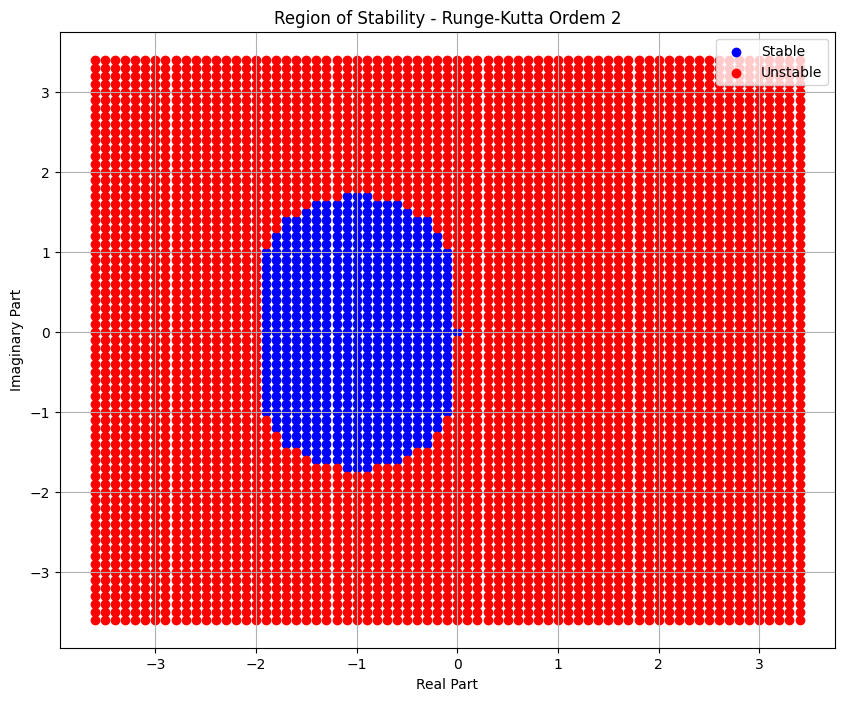

<ipython-input-13-4c64295beaf9>:38: ComplexWarning: Casting complex values to real discards the imaginary part
  u_values[i] = u


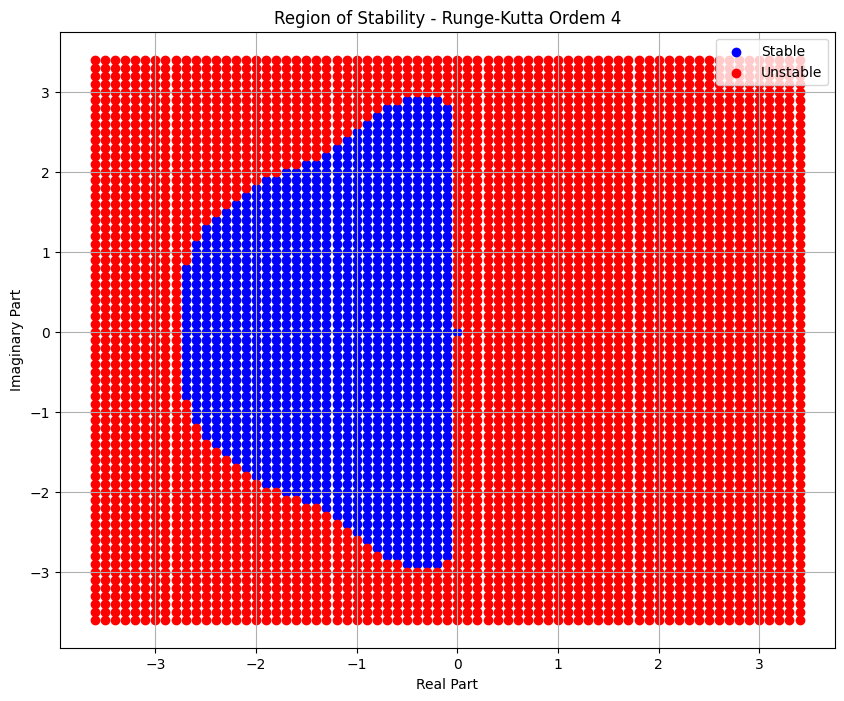

<ipython-input-13-4c64295beaf9>:56: ComplexWarning: Casting complex values to real discards the imaginary part
  u_values[1] = u1
<ipython-input-13-4c64295beaf9>:64: ComplexWarning: Casting complex values to real discards the imaginary part
  u_values[i] = u


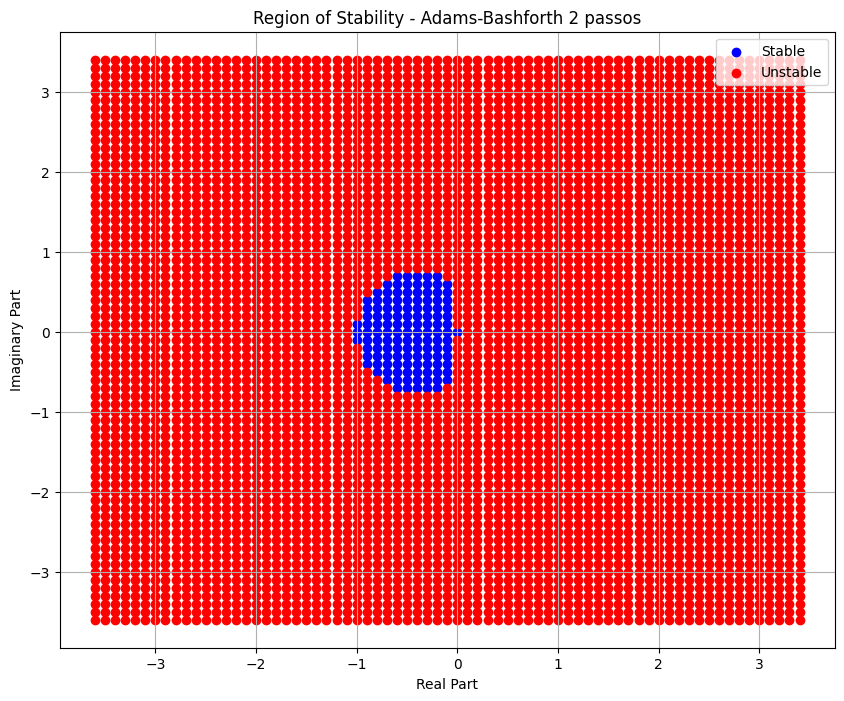

<ipython-input-13-4c64295beaf9>:95: ComplexWarning: Casting complex values to real discards the imaginary part
  u_values[1] = u1
<ipython-input-13-4c64295beaf9>:109: ComplexWarning: Casting complex values to real discards the imaginary part
  u_values[i] = u
<ipython-input-13-4c64295beaf9>:74: RuntimeWarning: overflow encountered in scalar multiply
  func = u - u_prev - (h / 12) * (5 * f(u, t, lambda_) + 8 * f(u_prev, t - h, lambda_) - f(u_prev_prev, t - 2 * h, lambda_))
<ipython-input-13-4c64295beaf9>:74: RuntimeWarning: invalid value encountered in scalar multiply
  func = u - u_prev - (h / 12) * (5 * f(u, t, lambda_) + 8 * f(u_prev, t - h, lambda_) - f(u_prev_prev, t - 2 * h, lambda_))
<ipython-input-13-4c64295beaf9>:77: RuntimeWarning: invalid value encountered in scalar divide
  delta = -func / dfunc
<ipython-input-13-4c64295beaf9>:10: RuntimeWarning: overflow encountered in scalar multiply
  return lambda_ * u
<ipython-input-13-4c64295beaf9>:75: RuntimeWarning: invalid value enc

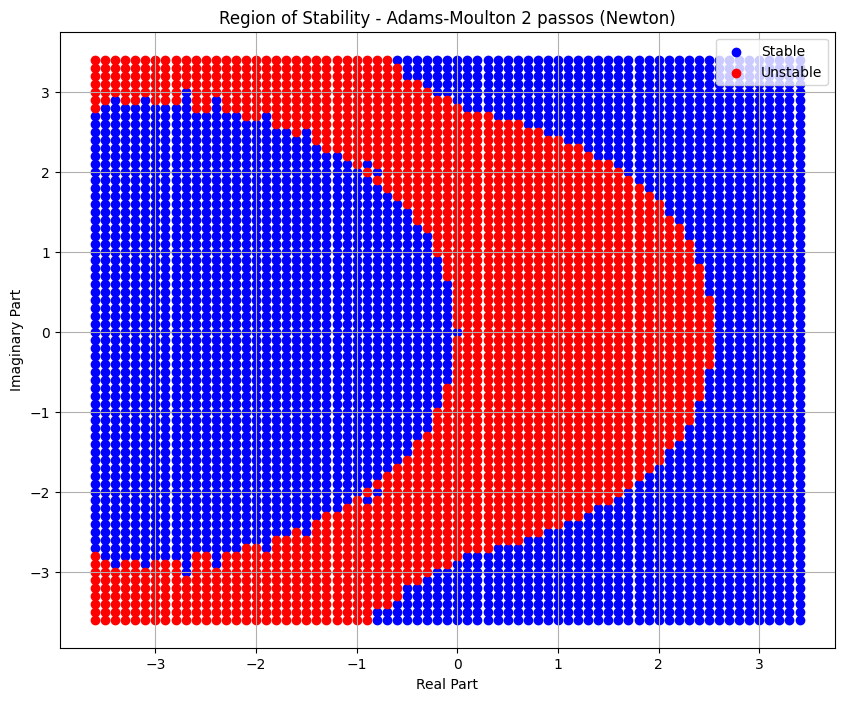

<ipython-input-13-4c64295beaf9>:123: ComplexWarning: Casting complex values to real discards the imaginary part
  u_values[1] = u1
<ipython-input-13-4c64295beaf9>:139: ComplexWarning: Casting complex values to real discards the imaginary part
  u_values[i] = u


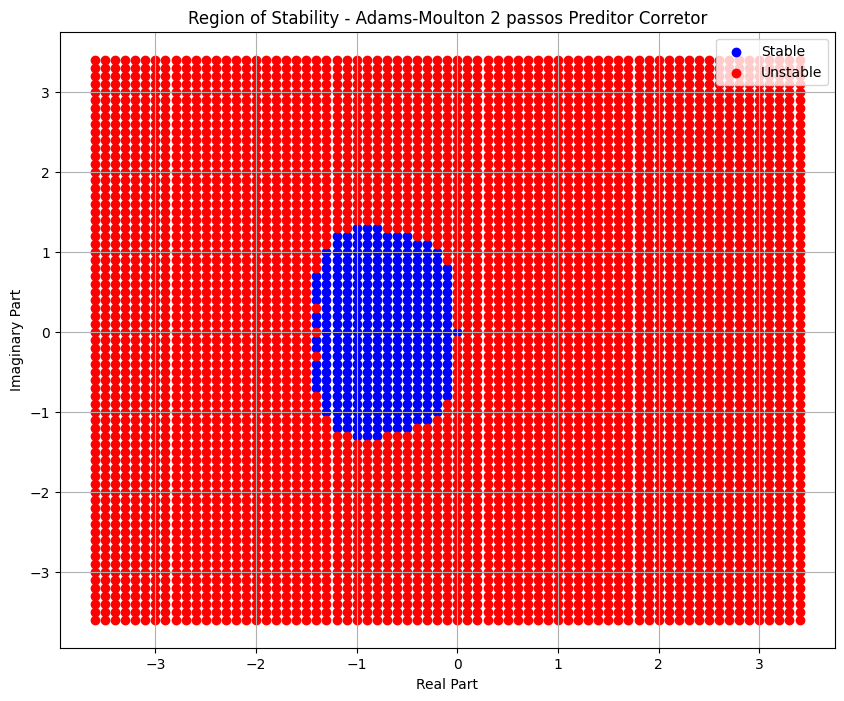

In [ ]:
# Função principal para resolver o problema
def resolver_problema(method, f, u0, t0, tf, h, lambda_):
    if method == 'Euler Explícito':
        return euler_explicito(f, u0, t0, tf, h, lambda_)
    elif method == 'Runge-Kutta Ordem 2':
        return runge_kutta_2(f, u0, t0, tf, h, lambda_)
    elif method == 'Runge-Kutta Ordem 4':
        return runge_kutta_4(f, u0, t0, tf, h, lambda_)
    elif method == 'Adams-Bashforth 2 passos':
        return adams_bashforth_2(f, u0, t0, tf, h, lambda_)
    elif method == 'Adams-Moulton 2 passos (Newton)':
        return adams_moulton_2_newton(f, u0, t0, tf, h, lambda_)
    elif method == 'Adams-Moulton 2 passos Preditor Corretor':
        return adams_moulton_2_predictor_corrector(f, u0, t0, tf, h, lambda_)

# Lista dos métodos
methods = [
    'Euler Explícito',
    'Runge-Kutta Ordem 2',
    'Runge-Kutta Ordem 4',
    'Adams-Bashforth 2 passos',
    'Adams-Moulton 2 passos (Newton)',
    'Adams-Moulton 2 passos Preditor Corretor'
]

# Parâmetros
u0 = 1
t0 = 0
tf = 10
h = 0.1  # Intervalo de tempo para comparação

# Geração da malha no plano complexo
real_range = np.arange(-3.6, 3.5, 0.1)
imag_range = np.arange(-3.6, 3.5, 0.1)
Z = np.array([[complex(x, y) for x in real_range] for y in imag_range])

# Resolução do problema e comparação
epsilon = 0.1
for method in methods:
    stable_points = []
    unstable_points = []
    for row in Z:
        for z in row:
            lambda_ = z / h  # z = lambda * h
            _, u_values = resolver_problema(method, f, u0, t0, tf, h, lambda_)
            u_exact = solucao_exata(tf, lambda_)
            if abs(u_values[-1] - u_exact) > epsilon:
                unstable_points.append(z)
            else:
                stable_points.append(z)
    stable_points = np.array(stable_points)
    unstable_points = np.array(unstable_points)

    plt.figure(figsize=(10, 8))
    if len(stable_points) > 0:
        plt.scatter(stable_points.real, stable_points.imag, color='blue', label='Stable')
    if len(unstable_points) > 0:
        plt.scatter(unstable_points.real, unstable_points.imag, color='red', label='Unstable')
    plt.title(f'Region of Stability - {method}')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.legend()
    plt.grid(True)
    plt.show()

#Tópico 3

#Tópico 4

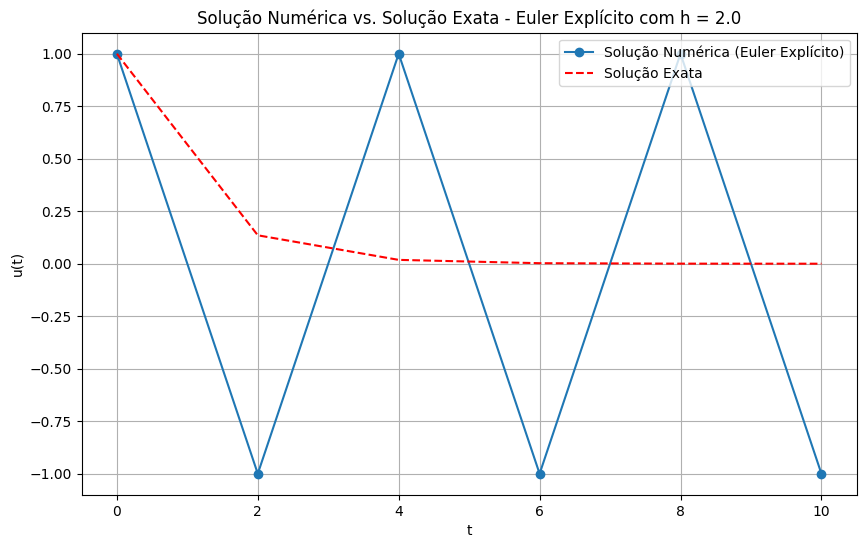

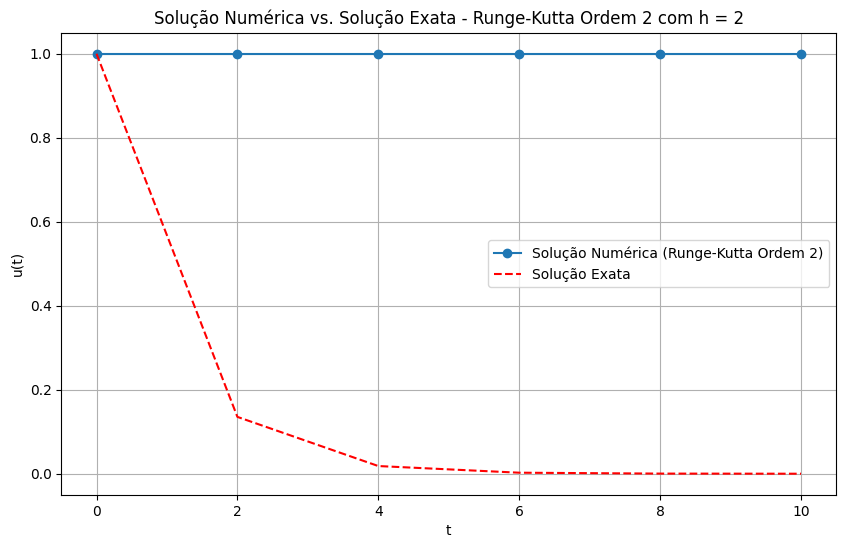

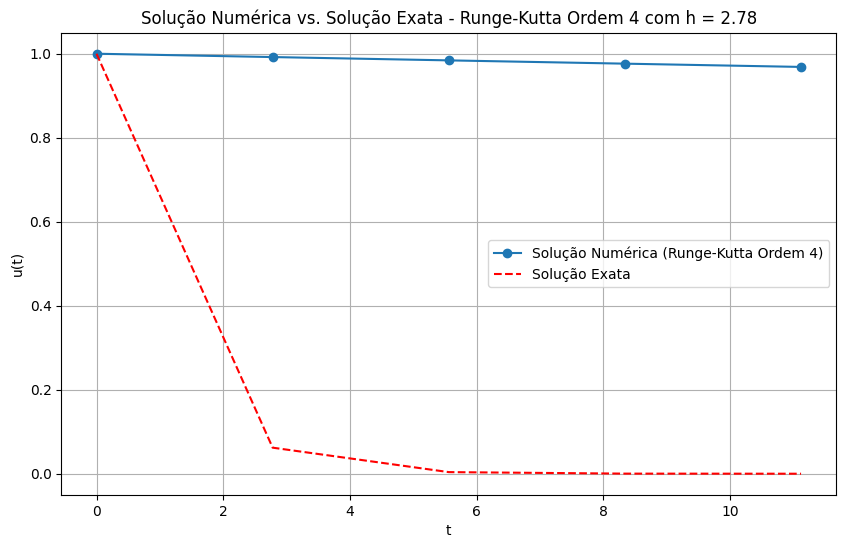

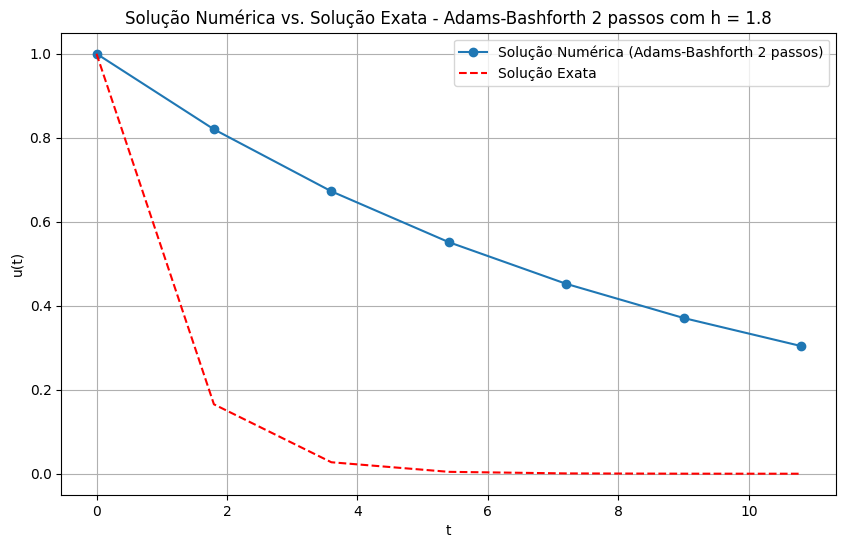

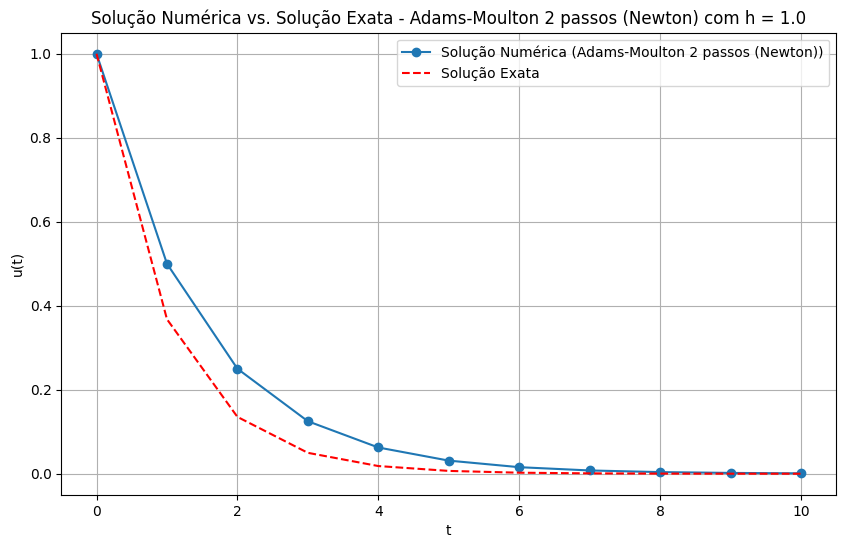

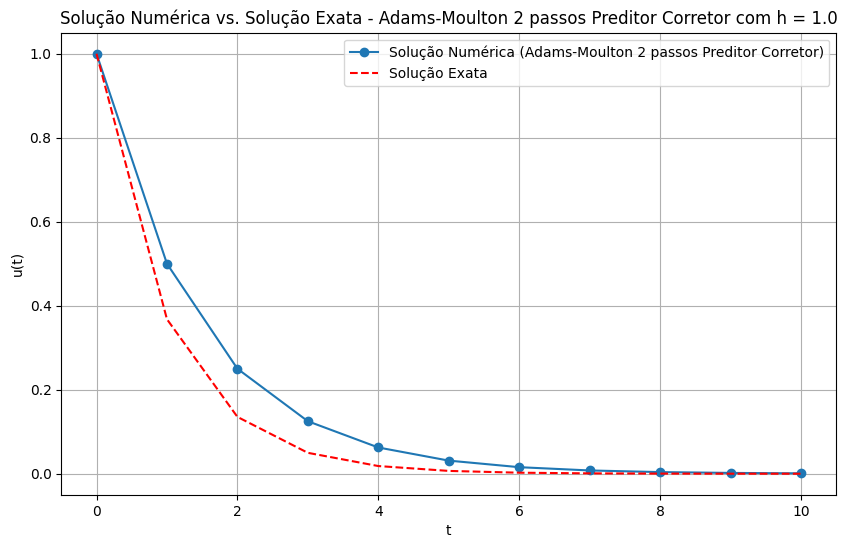

In [ ]:
# Resolvendo problema com diferentes métodos e plotando
def resolver_e_plotar(method, f, u0, t0, tf, h, lambda_, method_name):
    t_vals = np.arange(t0, tf + h, h)
    u_vals = [u0]
    u = u0
    for t in t_vals[:-1]:
        u = resolver_problema(method, f, u, t, t + h, h, lambda_)
        u_vals.append(u)
    u_exact = solucao_exata(t_vals, lambda_)

    plt.figure(figsize=(10, 6))
    plt.plot(t_vals, u_vals, 'o-', label=f'Solução Numérica ({method_name})')
    plt.plot(t_vals, u_exact, 'r--', label='Solução Exata')
    plt.xlabel('t')
    plt.ylabel('u(t)')
    plt.title(f'Solução Numérica vs. Solução Exata - {method_name} com h = {h}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parâmetros
u0 = 1.0
t0 = 0
tf = 10
lambda_ = -1

# Limites de h baseados na estabilidade dos métodos
h_values = {
    'Euler Explícito': 2.0,
    'Runge-Kutta Ordem 2': 2,
    'Runge-Kutta Ordem 4': 2.78,
    'Adams-Bashforth 2 passos': 1.8,
    'Adams-Moulton 2 passos (Newton)': 1.0,
    'Adams-Moulton 2 passos Preditor Corretor': 1.0
}

# Plotando para cada método
for method_name, h in h_values.items():
    resolver_e_plotar(method_name, f, u0, t0, tf, h, lambda_, method_name)


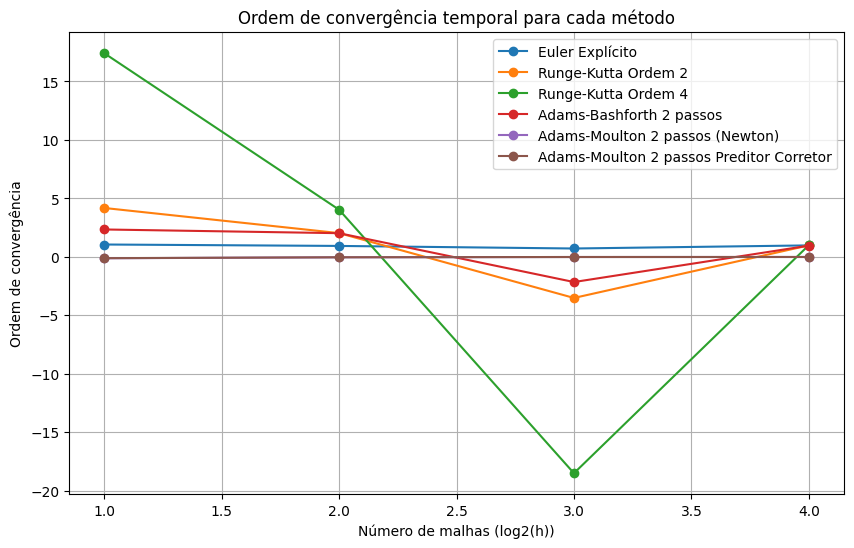

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função exata
def solucao_exata(t, lambda_):
    return np.exp(lambda_ * t)

# Função para calcular a ordem de convergência temporal
def calcular_ordem_convergencia(erro_anterior, erro_atual, h_anterior, h_atual):
    return np.log(erro_atual / erro_anterior) / np.log(h_atual / h_anterior)

# Tamanho do passo inicial e número de malhas
h_inicial = 0.1
num_malhas = 5

# Valor de lambda
lambda_ = -1

# Lista para armazenar as ordens de convergência para cada método
ordens_convergencia_euler = []
ordens_convergencia_rk2 = []
ordens_convergencia_rk4 = []
ordens_convergencia_ab2 = []
ordens_convergencia_am_newton = []
ordens_convergencia_am_pred_corr = []

# Loop sobre as malhas
for i in range(num_malhas):
    # Calcular o tamanho do passo atual
    h_atual = h_inicial / (2 ** i)

    # Calcular a solução numérica para cada método
    u_euler = resolver_problema('Euler Explícito', f, 1.0, 0, 10, h_atual, lambda_)
    u_rk2 = resolver_problema('Runge-Kutta Ordem 2', f, 1.0, 0, 10, h_atual, lambda_)
    u_rk4 = resolver_problema('Runge-Kutta Ordem 4', f, 1.0, 0, 10, h_atual, lambda_)
    u_ab2 = resolver_problema('Adams-Bashforth 2 passos', f, 1.0, 0, 10, h_atual, lambda_)
    u_am_newton = resolver_problema('Adams-Moulton 2 passos (Newton)', f, 1.0, 0, 10, h_atual, lambda_)
    u_am_pred_corr = resolver_problema('Adams-Moulton 2 passos Preditor Corretor', f, 1.0, 0, 10, h_atual, lambda_)
    u_exata = solucao_exata(10, lambda_)

    # Calcular os erros entre as soluções numéricas e a solução exata
    erro_euler = np.abs(u_euler - u_exata)
    erro_rk2 = np.abs(u_rk2 - u_exata)
    erro_rk4 = np.abs(u_rk4 - u_exata)
    erro_ab2 = np.abs(u_ab2 - u_exata)
    erro_am_newton = np.abs(u_am_newton - u_exata)
    erro_am_pred_corr = np.abs(u_am_pred_corr - u_exata)

    if i > 0:
        # Calcular as ordens de convergência para cada método
        ordem_euler = calcular_ordem_convergencia(erro_anterior_euler, erro_euler, h_anterior, h_atual)
        ordem_rk2 = calcular_ordem_convergencia(erro_anterior_rk2, erro_rk2, h_anterior, h_atual)
        ordem_rk4 = calcular_ordem_convergencia(erro_anterior_rk4, erro_rk4, h_anterior, h_atual)
        ordem_ab2 = calcular_ordem_convergencia(erro_anterior_ab2, erro_ab2, h_anterior, h_atual)
        ordem_am_newton = calcular_ordem_convergencia(erro_anterior_am_newton, erro_am_newton, h_anterior, h_atual)
        ordem_am_pred_corr = calcular_ordem_convergencia(erro_anterior_am_pred_corr, erro_am_pred_corr, h_anterior, h_atual)

        # Armazenar as ordens de convergência para cada método
        ordens_convergencia_euler.append(ordem_euler)
        ordens_convergencia_rk2.append(ordem_rk2)
        ordens_convergencia_rk4.append(ordem_rk4)
        ordens_convergencia_ab2.append(ordem_ab2)
        ordens_convergencia_am_newton.append(ordem_am_newton)
        ordens_convergencia_am_pred_corr.append(ordem_am_pred_corr)

    # Armazenar os erros atuais para o próximo cálculo das ordens
    erro_anterior_euler = erro_euler
    erro_anterior_rk2 = erro_rk2
    erro_anterior_rk4 = erro_rk4
    erro_anterior_ab2 = erro_ab2
    erro_anterior_am_newton = erro_am_newton
    erro_anterior_am_pred_corr = erro_am_pred_corr
    h_anterior = h_atual

# Plotar as ordens de convergência para cada método
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_malhas), ordens_convergencia_euler, marker='o', label='Euler Explícito')
plt.plot(range(1, num_malhas), ordens_convergencia_rk2, marker='o', label='Runge-Kutta Ordem 2')
plt.plot(range(1, num_malhas), ordens_convergencia_rk4, marker='o', label='Runge-Kutta Ordem 4')
plt.plot(range(1, num_malhas), ordens_convergencia_ab2, marker='o', label='Adams-Bashforth 2 passos')
plt.plot(range(1, num_malhas), ordens_convergencia_am_newton, marker='o', label='Adams-Moulton 2 passos (Newton)')
plt.plot(range(1, num_malhas), ordens_convergencia_am_pred_corr, marker='o', label='Adams-Moulton 2 passos Preditor Corretor')
plt.xlabel('Número de malhas (log2(h))')
plt.ylabel('Ordem de convergência')
plt.title('Ordem de convergência temporal para cada método')
plt.legend()
plt.grid(True)
plt.show()
